# Prescriptive Analysis for Delhi Air Quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [2]:
data=pd.read_csv("data.csv")
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,55,05-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN
1,55,08-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN
2,55,13-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN
3,55,16-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0
4,55,21-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0


In [3]:
data.describe()

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
count,744.000000,731.000000,732.000000,733.000000,371.000000
mean,165.866935,5.638851,67.356557,218.834925,95.113208
std,155.768826,5.579888,35.175968,104.708501,47.127178
min,55.000000,2.000000,18.000000,18.000000,14.000000
25%,58.000000,4.000000,45.000000,149.000000,62.000000
50%,60.000000,4.000000,53.000000,210.000000,86.000000
75%,146.000000,4.000000,80.000000,271.000000,118.500000
max,531.000000,46.000000,224.000000,892.000000,318.000000


In [4]:
data.rename(columns={"Stn Code":"Stn_code","Sampling Date":"sampling_date", "State":"state","City/Town/Village/Area":"city",
"Location of Monitoring Station":"Location","Agency":"agency","Type of Location":"type_of_location","RSPM/PM10":"RSPM","PM 2.5":"PM"},inplace=True)
data.columns

Index(['Stn_code', 'sampling_date', 'state', 'city', 'Location', 'agency',
       'type_of_location', 'SO2', 'NO2', 'RSPM', 'PM'],
      dtype='object')

In [5]:
print("Station code:",data.Stn_code.unique())
print("-------------------------------------")
print("Location:",data.Location.unique())
print("-----------------------------------")
print("agency:",data.agency.unique())
print("-----------------------------------")
print("type_of_location:",data.type_of_location.unique())
print("-----------------------------------")

Station code: [ 55  57  58  59  60 144 146 345 531]
-------------------------------------
Location: ['Nizamuddin, Delhi' 'Shahzada Bagh, Delhi' 'Shahadra, Delhi'
 'Janakpuri, Delhi' 'Siri Fort, Delhi'
 'N.Y. SCHOOL, Sarojini Nagar, Delhi'
 'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi'
 'Mayapuri Industrial Area, Delhi' 'Pritampura, Delhi']
-----------------------------------
agency: ['Central Pollution Control Board'
 'National Environmental Engineering Research Institute']
-----------------------------------
type_of_location: ['Residential, Rural and other Areas' 'Industrial Area']
-----------------------------------


In [6]:
data.dtypes

Stn_code              int64
sampling_date        object
state                object
city                 object
Location             object
agency               object
type_of_location     object
SO2                 float64
NO2                 float64
RSPM                float64
PM                  float64
dtype: object

In [7]:
data['sampling_date']=pd.to_datetime(data['sampling_date'])
data['Date']=data['sampling_date']
data.set_index('sampling_date',inplace=True)

In [8]:
data.head()

,Stn_code,state,city,Location,agency,type_of_location,SO2,NO2,RSPM,PM,Date
sampling_date,,,,,,,,,,,
2015-05-01,55,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN,2015-05-01
2015-08-01,55,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN,2015-08-01
2015-01-13,55,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN,2015-01-13
2015-01-16,55,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0,2015-01-16
2015-01-21,55,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0,2015-01-21


In [9]:
data=data.drop(columns={"Stn_code","state","city"})

In [10]:
data.count()

Location            744
agency              744
type_of_location    744
SO2                 731
NO2                 732
RSPM                733
PM                  371
Date                744
dtype: int64

In [11]:
data=data.fillna(method="ffill")
data.count()

Location            744
agency              744
type_of_location    744
SO2                 744
NO2                 744
RSPM                744
PM                  741
Date                744
dtype: int64

In [12]:
data_CPB=data[data.agency!="National Environmental Engineering Research Institute"]
data_CPB.count()

Location            463
agency              463
type_of_location    463
SO2                 463
NO2                 463
RSPM                463
PM                  460
Date                463
dtype: int64

In [13]:
data_NEI=data[data.agency!="Central Pollution Control Board"]
data_NEI.count()

Location            281
agency              281
type_of_location    281
SO2                 281
NO2                 281
RSPM                281
PM                  281
Date                281
dtype: int64

## SO2 in Delhi Air Quality

In [14]:
monthwise_SO2_CPB=data_CPB.groupby(data_CPB['Date'].dt.strftime('%B'))['SO2'].sum()
monthwise_SO2_CPB=pd.DataFrame(monthwise_SO2_CPB)
monthwise_SO2_CPB=monthwise_SO2_CPB.reset_index()
monthwise_SO2_CPB=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_SO2_CPB, monthcolumn='Date',numericcolumn='SO2')

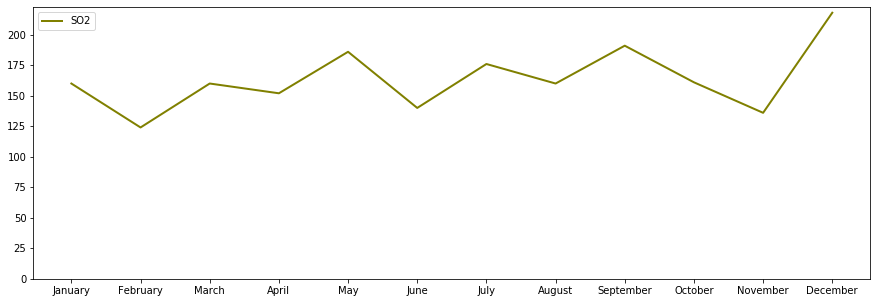

In [15]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'SO2', data=monthwise_SO2_CPB, marker='', color='olive', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

The main source of sulfur dioxide in the air is industrial activity that processes materials that contain sulfur, eg the generation of electricity from coal, oil or gas that contains sulfur. Some mineral ores also contain sulfur, and sulfur dioxide is released when they are processed.

In [16]:
data_industrial=data_CPB[data_CPB.type_of_location=="Industrial Area"]
data_industrial.head()

,Location,agency,type_of_location,SO2,NO2,RSPM,PM,Date
sampling_date,,,,,,,,
2015-01-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,67.0,397.0,110.0,2015-01-01
2015-06-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,55.0,250.0,155.0,2015-06-01
2015-09-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,65.0,344.0,163.0,2015-09-01
2015-01-14,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,61.0,258.0,144.0,2015-01-14
2015-01-19,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,58.0,351.0,135.0,2015-01-19


In [17]:
monthwise_SO2_industrial=data_industrial.groupby(data_industrial['Date'].dt.strftime('%B'))['SO2'].sum()
monthwise_SO2_industrial=pd.DataFrame(monthwise_SO2_industrial)
monthwise_SO2_industrial=monthwise_SO2_industrial.reset_index()
monthwise_SO2_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_SO2_industrial, monthcolumn='Date',numericcolumn='SO2')

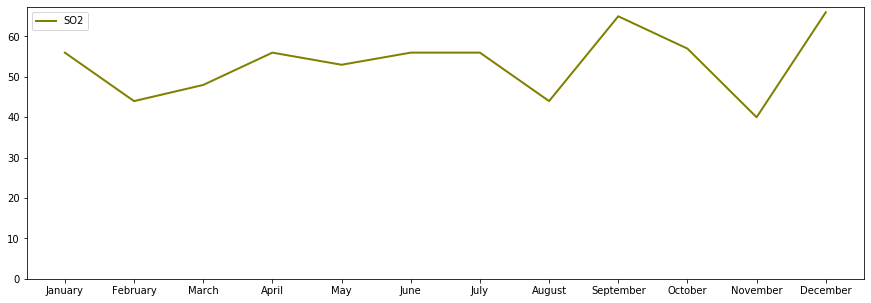

In [18]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'SO2', data=monthwise_SO2_industrial, marker='', color='olive', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

From above graph,We can directly say that amount of SO2 in delhi air quality is directly connected with industrial area of delhi but let's check howmuch residential and rural area is participating in high sulfurdixoide in delhi air.

In [19]:
data_residential=data_CPB[data_CPB.type_of_location=="Residential, Rural and other Areas"]
data_residential.head()

,Location,agency,type_of_location,SO2,NO2,RSPM,PM,Date
sampling_date,,,,,,,,
2015-05-01,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN,2015-05-01
2015-08-01,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN,2015-08-01
2015-01-13,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN,2015-01-13
2015-01-16,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0,2015-01-16
2015-01-21,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0,2015-01-21


In [20]:
monthwise_SO2_residential=data_residential.groupby(data_residential['Date'].dt.strftime('%B'))['SO2'].sum()
monthwise_SO2_residential=pd.DataFrame(monthwise_SO2_residential)
monthwise_SO2_residential=monthwise_SO2_residential.reset_index()
monthwise_SO2_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_SO2_residential, monthcolumn='Date',numericcolumn='SO2')

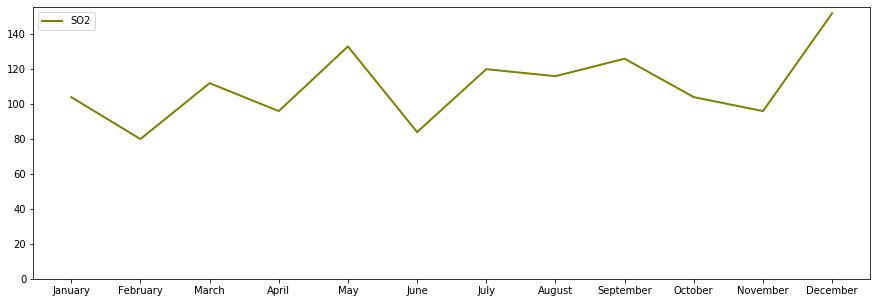

In [21]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'SO2', data=monthwise_SO2_residential, marker='', color='olive', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

Delhi government claims that these reductions are the result of rigorous rule enforcement, experts said current climate conditions have played a big role.
                                                                                                        -Economic Times

## NO2 in Delhi Air Quality

In [22]:
monthwise_NO2_CPB=data_CPB.groupby(data_CPB['Date'].dt.strftime('%B'))['NO2'].sum()
monthwise_NO2_CPB=pd.DataFrame(monthwise_NO2_CPB)
monthwise_NO2_CPB=monthwise_NO2_CPB.reset_index()
monthwise_NO2_CPB=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_NO2_CPB, monthcolumn='Date',numericcolumn='NO2')

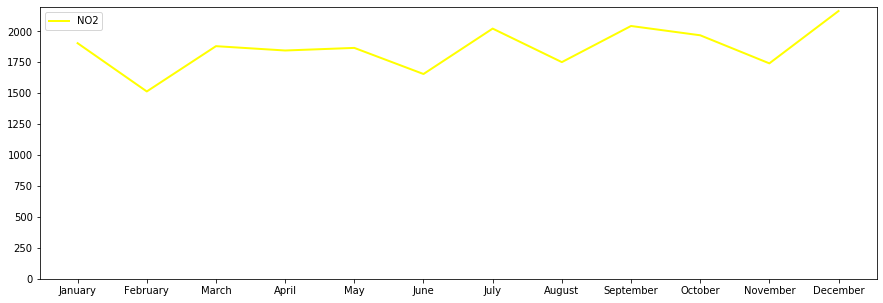

In [23]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'NO2',data=monthwise_NO2_CPB, marker='', color='yellow', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

## RSPM in Delhi Air Quality

In [24]:
monthwise_RSPM_CPB=data_CPB.groupby(data_CPB['Date'].dt.strftime('%B'))['RSPM'].sum()
monthwise_RSPM_CPB=pd.DataFrame(monthwise_RSPM_CPB)
monthwise_RSPM_CPB=monthwise_RSPM_CPB.reset_index()
monthwise_RSPM_CPB=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_RSPM_CPB, monthcolumn='Date',numericcolumn='RSPM')

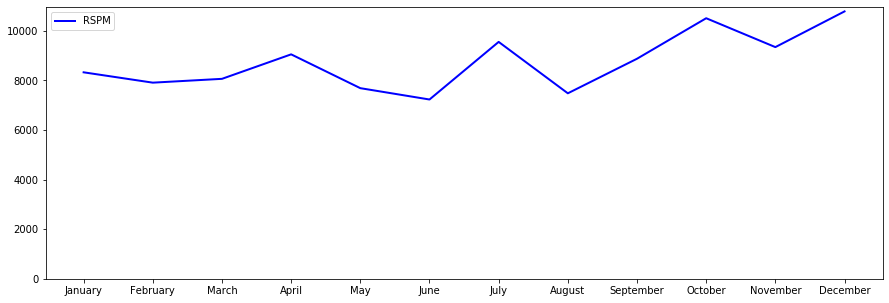

In [25]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'RSPM',data=monthwise_RSPM_CPB, marker='', color='blue', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

In [26]:
data_industrial=data_CPB[data_CPB.type_of_location=="Industrial Area"]
data_industrial.head()

,Location,agency,type_of_location,SO2,NO2,RSPM,PM,Date
sampling_date,,,,,,,,
2015-01-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,67.0,397.0,110.0,2015-01-01
2015-06-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,55.0,250.0,155.0,2015-06-01
2015-09-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,65.0,344.0,163.0,2015-09-01
2015-01-14,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,61.0,258.0,144.0,2015-01-14
2015-01-19,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,58.0,351.0,135.0,2015-01-19


In [27]:
monthwise_RSPM_industrial=data_industrial.groupby(data_industrial['Date'].dt.strftime('%B'))['RSPM'].sum()
monthwise_RSPM_industrial=pd.DataFrame(monthwise_RSPM_industrial)
monthwise_RSPM_industrial=monthwise_RSPM_industrial.reset_index()
monthwise_RSPM_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_RSPM_industrial, monthcolumn='Date',numericcolumn='RSPM')

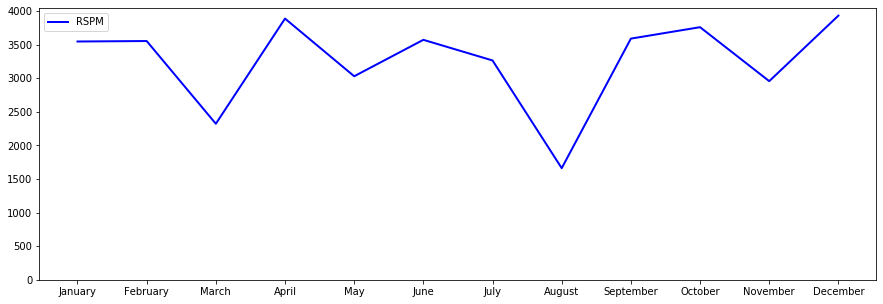

In [28]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'RSPM', data=monthwise_RSPM_industrial, marker='', color='blue', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

In [29]:
data_residential=data_CPB[data_CPB.type_of_location=="Residential, Rural and other Areas"]
data_residential.head()

,Location,agency,type_of_location,SO2,NO2,RSPM,PM,Date
sampling_date,,,,,,,,
2015-05-01,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN,2015-05-01
2015-08-01,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN,2015-08-01
2015-01-13,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN,2015-01-13
2015-01-16,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0,2015-01-16
2015-01-21,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0,2015-01-21


In [30]:
monthwise_RSPM_residential=data_residential.groupby(data_residential['Date'].dt.strftime('%B'))['RSPM'].sum()
monthwise_RSPM_residential=pd.DataFrame(monthwise_RSPM_residential)
monthwise_RSPM_residential=monthwise_RSPM_residential.reset_index()
monthwise_RSPM_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_RSPM_residential, monthcolumn='Date',numericcolumn='RSPM')

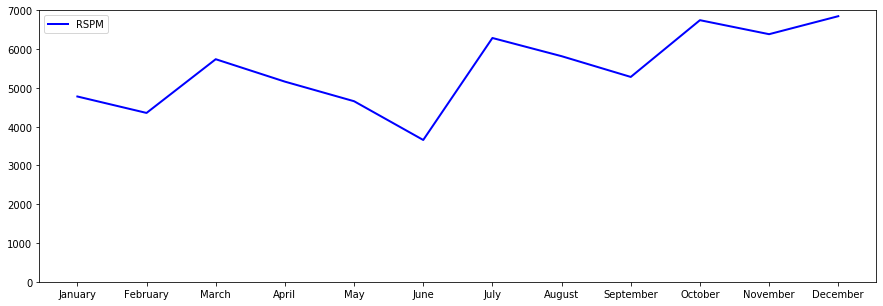

In [31]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'RSPM', data=monthwise_RSPM_residential, marker='', color='blue', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

# PM in Delhi Air Quality

In [32]:
monthwise_PM_CPB=data_CPB.groupby(data_CPB['Date'].dt.strftime('%B'))['PM'].sum()
monthwise_PM_CPB=pd.DataFrame(monthwise_PM_CPB)
monthwise_PM_CPB=monthwise_PM_CPB.reset_index()
monthwise_PM_CPB=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_PM_CPB, monthcolumn='Date',numericcolumn='PM')

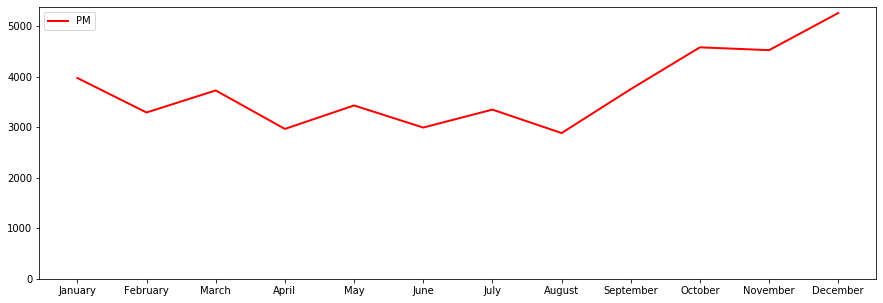

In [33]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'PM',data=monthwise_PM_CPB, marker='', color='red', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

In [34]:
data_industrial=data_CPB[data_CPB.type_of_location=="Industrial Area"]
data_industrial.head()

,Location,agency,type_of_location,SO2,NO2,RSPM,PM,Date
sampling_date,,,,,,,,
2015-01-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,67.0,397.0,110.0,2015-01-01
2015-06-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,55.0,250.0,155.0,2015-06-01
2015-09-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,65.0,344.0,163.0,2015-09-01
2015-01-14,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,61.0,258.0,144.0,2015-01-14
2015-01-19,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,58.0,351.0,135.0,2015-01-19


In [35]:
monthwise_PM_industrial=data_industrial.groupby(data_industrial['Date'].dt.strftime('%B'))['PM'].sum()
monthwise_PM_industrial=pd.DataFrame(monthwise_PM_industrial)
monthwise_PM_industrial=monthwise_PM_industrial.reset_index()
monthwise_PM_industrial=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_PM_industrial, monthcolumn='Date',numericcolumn='PM')

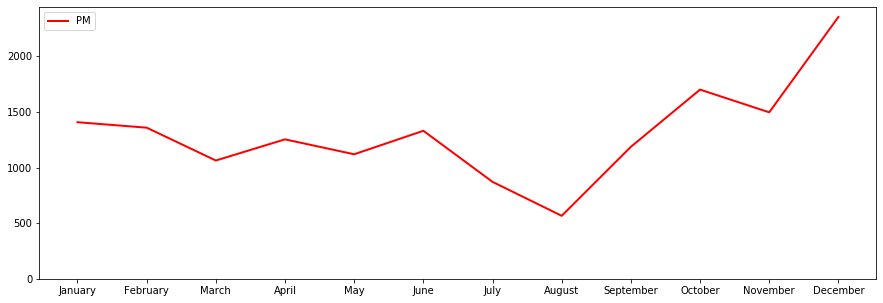

In [36]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'PM',data=monthwise_PM_industrial, marker='', color='red', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

In [37]:
data_residential=data_CPB[data_CPB.type_of_location=="Residential, Rural and other Areas"]
data_residential.head()

,Location,agency,type_of_location,SO2,NO2,RSPM,PM,Date
sampling_date,,,,,,,,
2015-05-01,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN,2015-05-01
2015-08-01,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN,2015-08-01
2015-01-13,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN,2015-01-13
2015-01-16,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0,2015-01-16
2015-01-21,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0,2015-01-21


In [38]:
monthwise_PM_residential=data_residential.groupby(data_residential['Date'].dt.strftime('%B'))['PM'].sum()
monthwise_PM_residential=pd.DataFrame(monthwise_PM_residential)
monthwise_PM_residential=monthwise_PM_residential.reset_index()
monthwise_PM_residential=Sort_Dataframeby_MonthandNumeric_cols(df = monthwise_PM_residential, monthcolumn='Date',numericcolumn='PM')

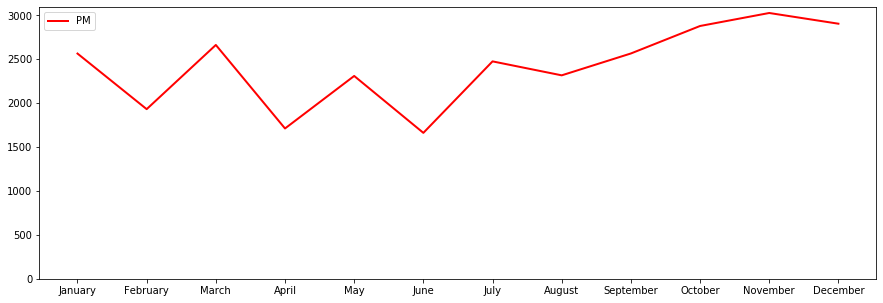

In [39]:
plt.figure(figsize=(15,5))
plt.plot('Date', 'PM',data=monthwise_PM_residential, marker='', color='red', linewidth=2)
plt.legend()
plt.ylim(0)
plt.show()

## Location based Analysis

###### SO2 Analysis

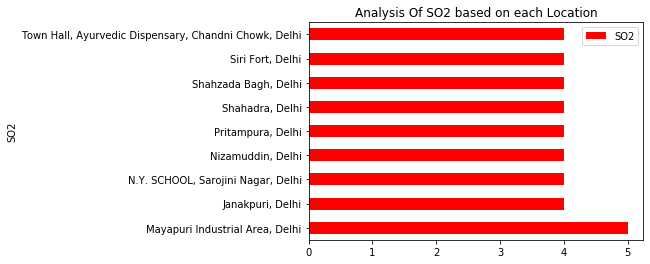

In [40]:
data[['SO2','Location']].groupby(["Location"]).median().sort_values(by='SO2',ascending=False).plot.barh(color='r')
plt.ylabel('SO2')
plt.title("Analysis Of SO2 based on each Location")
plt.show()

###### NO2 Analysis

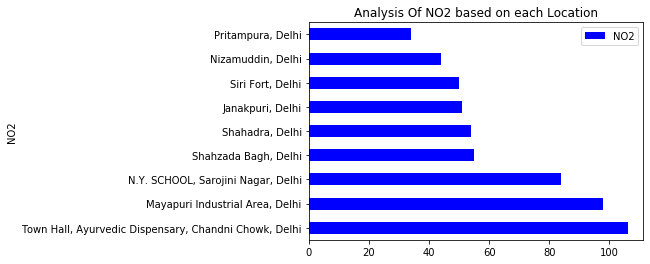

In [41]:
data[['NO2','Location']].groupby(["Location"]).median().sort_values(by='NO2',ascending=False).plot.barh(color='b')
plt.ylabel('NO2')
plt.title("Analysis Of NO2 based on each Location")
plt.show()

###### RSPM Analysis

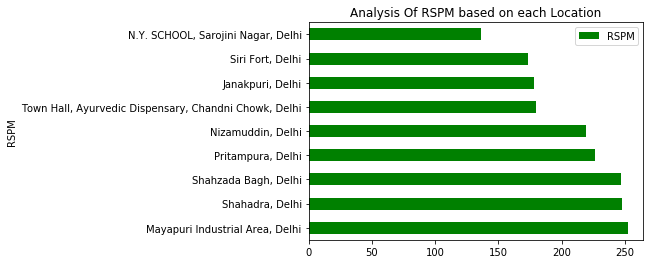

In [42]:
data[['RSPM','Location']].groupby(["Location"]).median().sort_values(by='RSPM',ascending=False).plot.barh(color='g')
plt.ylabel('RSPM')
plt.title("Analysis Of RSPM based on each Location")
plt.show()

###### PM

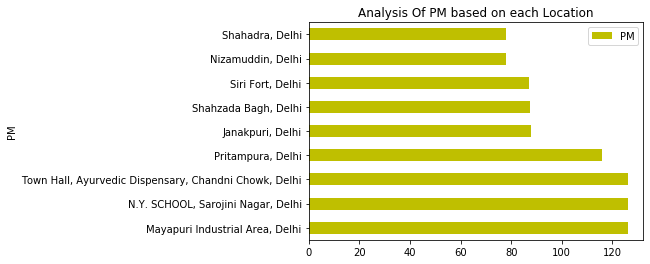

In [43]:
data[['PM','Location']].groupby(["Location"]).median().sort_values(by='PM',ascending=False).plot.barh(color='y')
plt.ylabel('PM')
plt.title("Analysis Of PM based on each Location")
plt.show()

## Residential Area

In [44]:
data_residential=data_CPB[data_CPB.type_of_location=="Residential, Rural and other Areas"]
data_residential.head()

,Location,agency,type_of_location,SO2,NO2,RSPM,PM,Date
sampling_date,,,,,,,,
2015-05-01,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,44.0,203.0,NaN,2015-05-01
2015-08-01,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,45.0,214.0,NaN,2015-08-01
2015-01-13,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,47.0,182.0,NaN,2015-01-13
2015-01-16,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,43.0,204.0,78.0,2015-01-16
2015-01-21,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4.0,39.0,192.0,83.0,2015-01-21


In [45]:
data_residential.Location.unique()

array(['Nizamuddin, Delhi', 'Janakpuri, Delhi', 'Siri Fort, Delhi',
       'Pritampura, Delhi'], dtype=object)

In [46]:
data_nizam=data_residential[data_residential.Location=="Nizamuddin, Delhi"]
data_janak=data_residential[data_residential.Location=="Janakpuri, Delhi"]
data_siri=data_residential[data_residential.Location=="Siri Fort, Delhi"]
data_pritam=data_residential[data_residential.Location=="Pritampura, Delhi"]

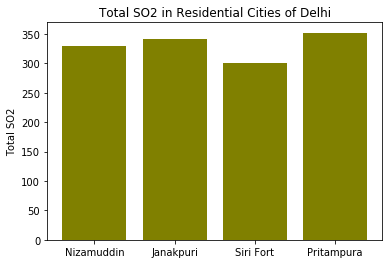

In [47]:
SO2_data={'City':['Nizamuddin','Janakpuri','Siri Fort','Pritampura'],'SO2':[data_nizam.SO2.sum(),data_janak.SO2.sum(),data_siri.SO2.sum(),data_pritam.SO2.sum()]}
SO2_data=pd.DataFrame(SO2_data)
plt.ylabel('Total SO2')
plt.title('Total SO2 in Residential Cities of Delhi')
plt.bar(SO2_data.City,SO2_data.SO2, align='center',color='olive')
plt.show()

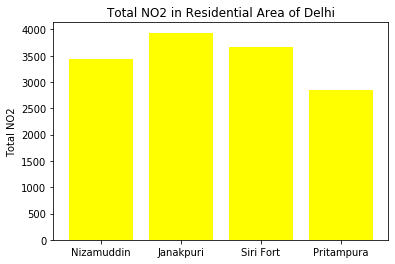

In [48]:
NO2_data={'City':['Nizamuddin','Janakpuri','Siri Fort','Pritampura'],'NO2':[data_nizam.NO2.sum(),data_janak.NO2.sum(),data_siri.NO2.sum(),data_pritam.NO2.sum()]}
NO2_data=pd.DataFrame(NO2_data)
plt.ylabel('Total NO2')
plt.title('Total NO2 in Residential Area of Delhi')
plt.bar(NO2_data.City,NO2_data.NO2, align='center',color='yellow')
plt.show()

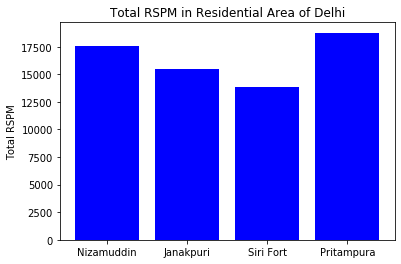

In [49]:
RSPM_data={'City':['Nizamuddin','Janakpuri','Siri Fort','Pritampura'],'RSPM':[data_nizam.RSPM.sum(),data_janak.RSPM.sum(),data_siri.RSPM.sum(),data_pritam.RSPM.sum()]}
RSPM_data=pd.DataFrame(RSPM_data)
plt.ylabel('Total RSPM')
plt.title('Total RSPM in Residential Area of Delhi')
plt.bar(RSPM_data.City,RSPM_data.RSPM, align='center',color='blue')
plt.show()

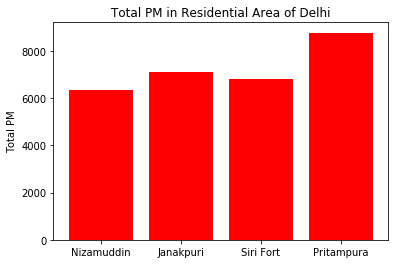

In [50]:
PM_data={'City':['Nizamuddin','Janakpuri','Siri Fort','Pritampura'],'PM':[data_nizam.PM.sum(),data_janak.PM.sum(),data_siri.PM.sum(),data_pritam.PM.sum()]}
PM_data=pd.DataFrame(PM_data)
plt.ylabel('Total PM')
plt.title('Total PM in Residential Area of Delhi')
plt.bar(PM_data.City,PM_data.PM, align='center',color="red")
plt.show()

# Industrial Area

In [51]:
data_industrial=data_CPB[data_CPB.type_of_location=="Industrial Area"]
data_industrial.head()

,Location,agency,type_of_location,SO2,NO2,RSPM,PM,Date
sampling_date,,,,,,,,
2015-01-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,67.0,397.0,110.0,2015-01-01
2015-06-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,55.0,250.0,155.0,2015-06-01
2015-09-01,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,65.0,344.0,163.0,2015-09-01
2015-01-14,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,61.0,258.0,144.0,2015-01-14
2015-01-19,"Shahzada Bagh, Delhi",Central Pollution Control Board,Industrial Area,4.0,58.0,351.0,135.0,2015-01-19


In [52]:
data_industrial.Location.unique()

array(['Shahzada Bagh, Delhi', 'Shahadra, Delhi'], dtype=object)

In [53]:
data_shahzada=data_industrial[data_industrial.Location=="Shahzada Bagh, Delhi"]
data_shahadra=data_industrial[data_industrial.Location=="Shahadra, Delhi"]

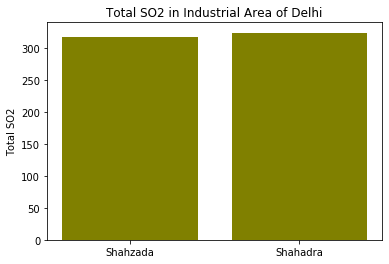

In [54]:
SO2_data={'City':['Shahzada','Shahadra'],'SO2':[data_shahzada.SO2.sum(),data_shahadra.SO2.sum()]}
SO2_data=pd.DataFrame(SO2_data)
plt.ylabel('Total SO2')
plt.title('Total SO2 in Industrial Area of Delhi')
plt.bar(SO2_data.City,SO2_data.SO2, align='center',color='olive')
plt.show()

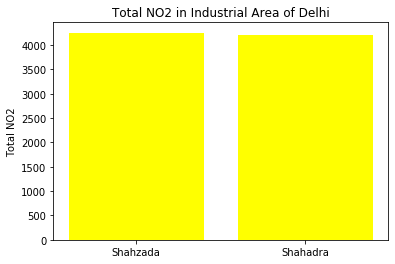

In [55]:
NO2_data={'City':['Shahzada','Shahadra'],'NO2':[data_shahzada.NO2.sum(),data_shahadra.NO2.sum()]}
NO2_data=pd.DataFrame(NO2_data)
plt.ylabel('Total NO2')
plt.title('Total NO2 in Industrial Area of Delhi')
plt.bar(NO2_data.City,NO2_data.NO2, align='center',color='yellow')
plt.show()

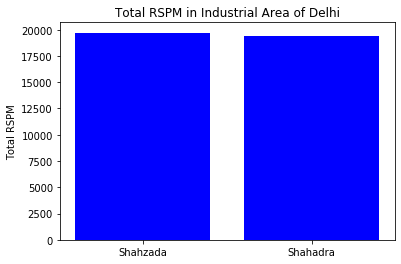

In [56]:
RSPM_data={'City':['Shahzada','Shahadra'],'RSPM':[data_shahzada.RSPM.sum(),data_shahadra.RSPM.sum()]}
RSPM_data=pd.DataFrame(RSPM_data)
plt.ylabel('Total RSPM')
plt.title('Total RSPM in Industrial Area of Delhi')
plt.bar(RSPM_data.City,RSPM_data.RSPM, align='center',color='blue')
plt.show()

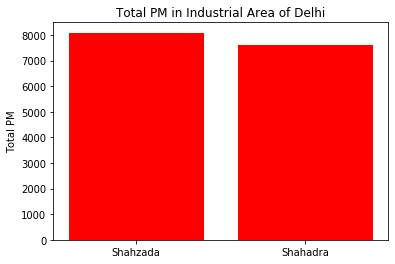

In [57]:
PM_data={'City':['Shahzada','Shahadra'],'NO2':[data_shahzada.PM.sum(),data_shahadra.PM.sum()]}
PM_data=pd.DataFrame(PM_data)
plt.ylabel('Total PM')
plt.title('Total PM in Industrial Area of Delhi')
plt.bar(PM_data.City,PM_data.NO2, align='center',color='red')
plt.show()

In [58]:
##### relationship between proportion of Sulphur Oxide & Nitrogen Oxide

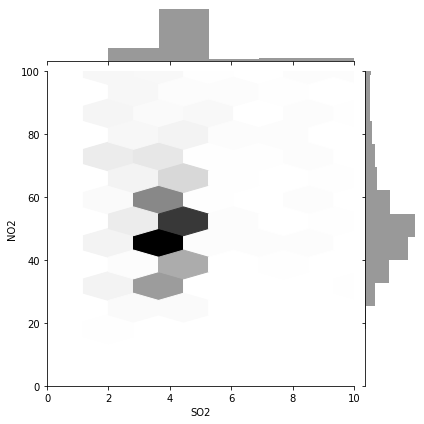

In [59]:
#sns.lmplot(x='SO2',y='NO2',data=data)
sns.jointplot(x='SO2', y='NO2', data=data,kind='hex',color='k',xlim={0,10}, ylim={0,100})

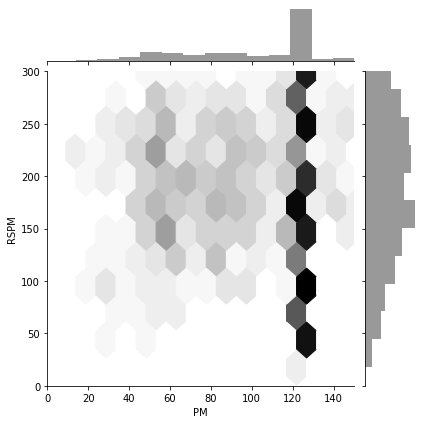

In [60]:
#sns.lmplot(x='SO2',y='NO2',data=data)
sns.jointplot(x='PM', y='RSPM', data=data,kind='hex',color='k',xlim={0,150}, ylim={0,300})